In [1]:
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
from numpy import linalg as LA
from ROOT import TLorentzVector
from array import array
# import PyTEX

import math

# sys.path.append('/nfshome/christiw/llp/delayed_jet_analyzer/lib/')
sys.path.append('/nfshome/jmao/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, create_TGraph,std_color_list
     
import CMS_lumi, tdrstyle 
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [4]:
dirs = {}

dirs['ntuple_RunIISummer16_SUS-RunIIFall17DRPremix-00183_TCHI_WH_300_1_aod_lhe_ctau_3k.root'] = '/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/'

dirs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root'] = '/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/'
 

out_dir = '/nfshome/jmao/cms-llp/plots/20190926/'

fnames = {}

fname = {
    'ntuple_RunIISummer16_SUS-RunIIFall17DRPremix-00183_TCHI_WH_300_1_aod_lhe_ctau_3k.root',
    'ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root',

        }

texs = {}

texs['ntuple_RunIISummer16_SUS-RunIIFall17DRPremix-00183_TCHI_WH_300_1_aod_lhe_ctau_3k.root'] = 'ctau = 1000 mm, W(lv)H(bb)'
texs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root'] = 'cms, W(lv)H(bb)'


cols = {}

 
cols['ntuple_RunIISummer16_SUS-RunIIFall17DRPremix-00183_TCHI_WH_300_1_aod_lhe_ctau_3k.root'] = 215
cols['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root'] = 207


styles = {}

styles['ntuple_RunIISummer16_SUS-RunIIFall17DRPremix-00183_TCHI_WH_300_1_aod_lhe_ctau_3k.root'] = 3
styles['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root'] = 4

tree = OrderedDict()

for file in fname:
    print(dirs[file]+file)
 
    root_dir = uproot.open(dirs[file]+file) 
    tree[file] = root_dir['ntuples/llp']
 
    print ('Open ready')
    print(texs[file])
    print ('Tree ready') 
    print(tree[file], tree)
    v = tree[file]
    llp_d_pid = v['gLLP_daughter_pid'].array()
    print(llp_d_pid[:10])

/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root
Open ready
cms, W(lv)H(bb)
Tree ready
<TTree b'llp' at 0x7fae630eec18> OrderedDict([('ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root', <TTree b'llp' at 0x7fae630eec18>)])
[[1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]]
/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/ntuple_RunIISummer16_SUS-RunIIFall17DRPremix-00183_TCHI_WH_300_1_aod_lhe_ctau_3k.root
Open ready
ctau = 1000 mm, W(lv)H(bb)
Tree ready
<TTree b'llp' at 0x7fae7eff9f60> OrderedDict([('ntuple_RunIISummer16_SUS-RunIIFall

# ctau

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root <TTree b'llp' at 0x7fae630eec18>
ntuple_RunIISummer16_SUS-RunIIFall17DRPremix-00183_TCHI_WH_300_1_aod_lhe_ctau_3k.root <TTree b'llp' at 0x7fae7eff9f60>
 FCN=46.514 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=5.63352e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.10434e+00   3.56440e-02   8.42291e-05   3.35836e-02
   2  Slope       -1.02144e-02   2.64621e-04   6.22436e-07   5.69336e+00


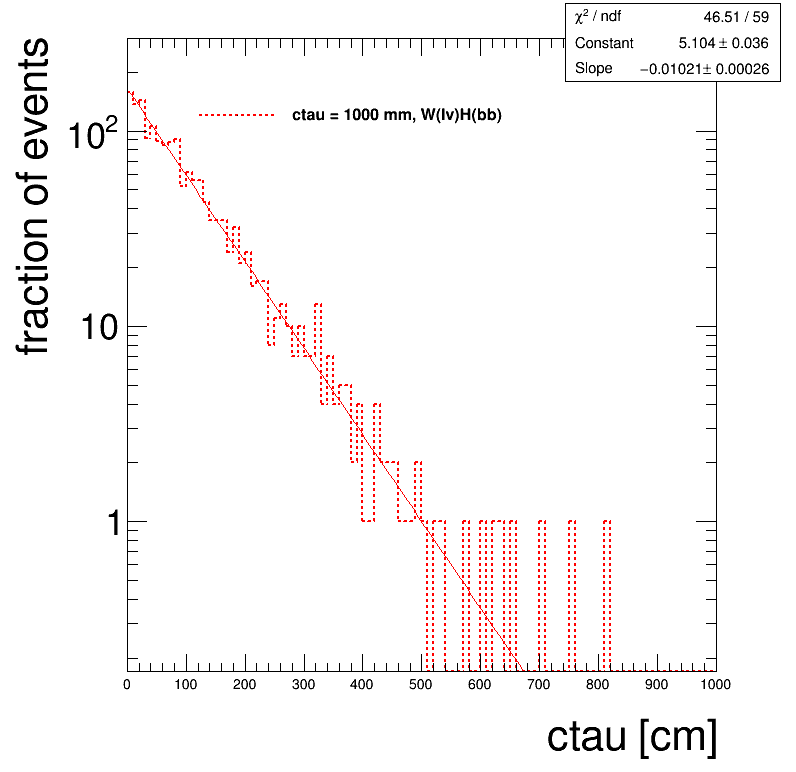

In [5]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.23,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}
hy = {}
hz = {}
hct = {}

 

for k,v in tree.items(): 
    print(k,v)
    
 
 
    if 'aod' in k:
    
 
        
        beta = v['gLLP_beta'].array()
 
        decay_x = v['gLLP_decay_vertex_x'].array()
        decay_y = v['gLLP_decay_vertex_y'].array()
        decay_z = v['gLLP_decay_vertex_z'].array()

#         h_x_all = decay_x.flatten()
#         h_y_all = decay_y.flatten()
#         h_z_all = decay_z.flatten()
        
#         h_beta_all = beta.flatten()
        h_x_all = decay_x[:,0]
        h_y_all = decay_y[:,0]
        h_z_all = decay_z[:,0]
        
        h_beta_all = beta[:,0]

        h_r_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_x_all, h_y_all)]
        h_d_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_r_all, h_z_all)]
        
        out_h_ct_flat = [x/y*(rt.TMath.Sqrt(1-pow(y ,2))) for x,y in zip(h_d_all, h_beta_all)]
        
    

        hct[k] = create_TH1D( out_h_ct_flat, axis_title=['ctau [cm]', 'fraction of events'], name="", binning=[100,-0,1000])
        hct[k].SetLineStyle(i+2)
        hct[k].SetLineColor(i+2)
#         hct[k].SetMarkerColor(cols[k])
        hct[k].GetXaxis().SetLabelSize(0.02)

        hct[k].Draw('same')
#         hct[k].DrawNormalized('same')
        hct[k].Fit('expo')
#         hct[k].Fit('expo','','',10,20000)
 

      

        leg.AddEntry(hct[k], texs[k])
        
 
 
        i += 1
    

# leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
# c.SetLogx()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
# c.SaveAs(out_dir+'decay_ctau_beta.png')